<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [22]:
# Installing the libraries with the specified version.
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 imbalanced-learn==0.10.1 -q --user

In [75]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# importing SMOTE
from imblearn.over_sampling import SMOTE

# Time related functions.
import time

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

import random

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [3]:
# Creating a dataframe ds variable to access the file loaded locally to Google Colab
ds = pd.read_csv("/content/bank-1.csv")

## Data Overview

In [4]:
# let's view the first 5 rows of the data
ds.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# let's view the last 5 rows of the data
ds.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Understand the shape of the dataset

In [6]:
# Shape depicts the number of rows and columns of the the file
# Understanding the number of rows and columns in the given dataset
print("There are", ds.shape[0], 'rows and', ds.shape[1], "columns.")

There are 10000 rows and 14 columns.


### Check the data types of the columns for the dataset

In [7]:
# Checking the detailed information on each column of the dataset
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


 - Except the columns Geography, Gender and Surname, all the other columns are numerical.

### Checking the Statistical Summary

In [8]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


### Checking for Missing Values

In [9]:
# Check columns list and missing values
ds.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


- We find no null values !

In [10]:
# Check if there are no duplicate values, across the row values in the dataset
ds.duplicated().sum()

np.int64(0)

- The above code implies the presence of no duplicate rows in the dataset

### Checking for unique values for each of the column

In [11]:
ds.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


- Out of the 10000 rows, we have first 2 fields as Row number and Customer Id all haveing unique values and the surname, does not contribute to the model build process and hence we exclude them from the dataframe.

In [12]:
#RowNumber , CustomerId and Surname are unique hence dropping it
ds = ds.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [13]:
# checking the data after dropping the above 3 columns
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [14]:
# Let's check the top 5 records to make some observations
ds.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


- From the above data, a couple of questions arise and remain unanswered, which need to be discussed with the Bakn Business Team:

The data appears to be a referenced at point in time e.g. the bank balance is for a given date say, which raises:
* What date is it and of what is the significance of the date ?
* It would be interesting to find out balances over a period of time instead of a single date.

There are customers who have exited, but still have a balance in their account - Does that mean, the balance is unaccounted for !
- Have they have exited from a product only and not the bank?

What does being an active member mean and are there different perspectives / inferences to it?

Could it be better to provide transaction count both in terms of credits and debits to the account instead, so we know the cash flow both in and out, to suggest better banking products ?

A break down to the products bought into by a customer could provide more information topping listing of product count, as it will help us understand what the Customers are really after based on past preferences ?

For this exercise, we proceed to model without much of Business context even though typically having better understanding of the data extraction process would give better insight and most importantly lead to contextual results of the modelling process !



## Exploratory Data Analysis

### Univariate Analysis

In [15]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [16]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on CreditScore

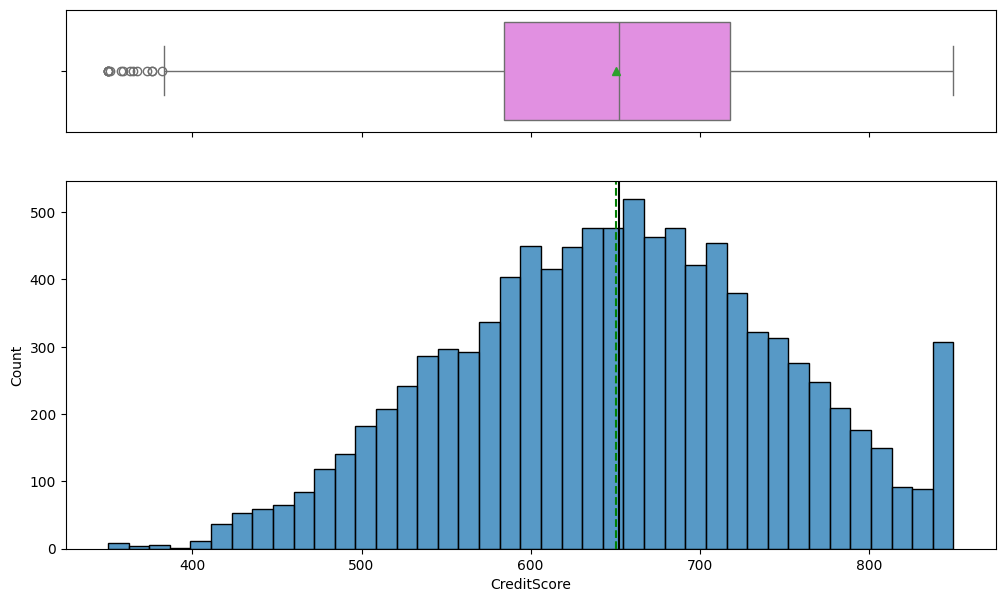

In [17]:
# Histogram Boxplot on CreditScore
histogram_boxplot(ds,'CreditScore')

**Observations**

* This is a uniform distribution, with the mean of 650.

#### Observations on Balance

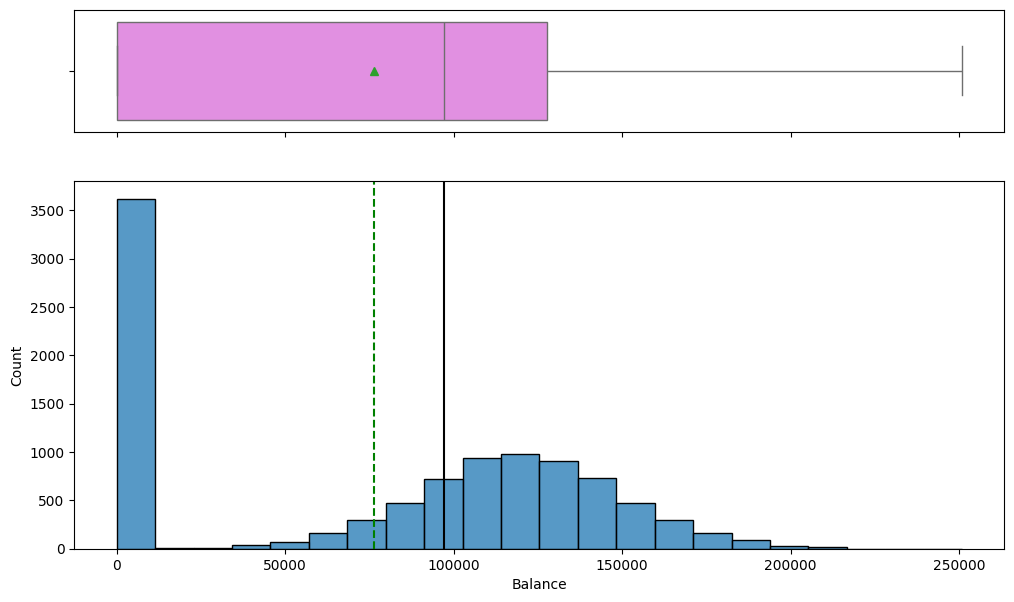

In [18]:
# Histogram Boxplot on Balance
histogram_boxplot(ds,'Balance')

**Observations**

* This is another skewed distribution, with customers having 0 balance are about 35%.

#### Observations on Age

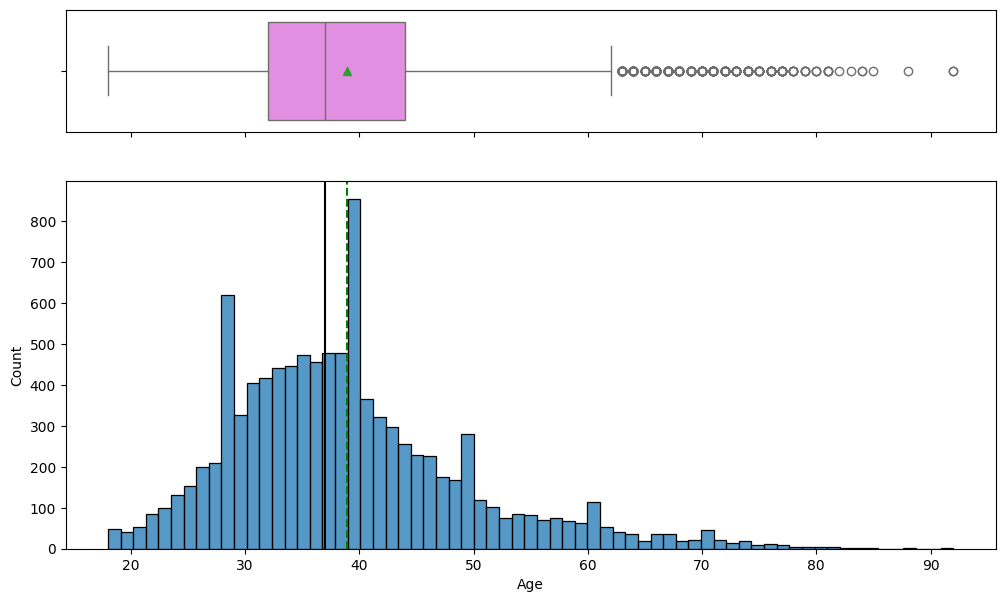

In [19]:
# Histogram Boxplot on Age
histogram_boxplot(ds,'Age')


**Observations**

* This is more or less uniform distribution, with average age around 39 years.

#### Observations on Estimated Salary

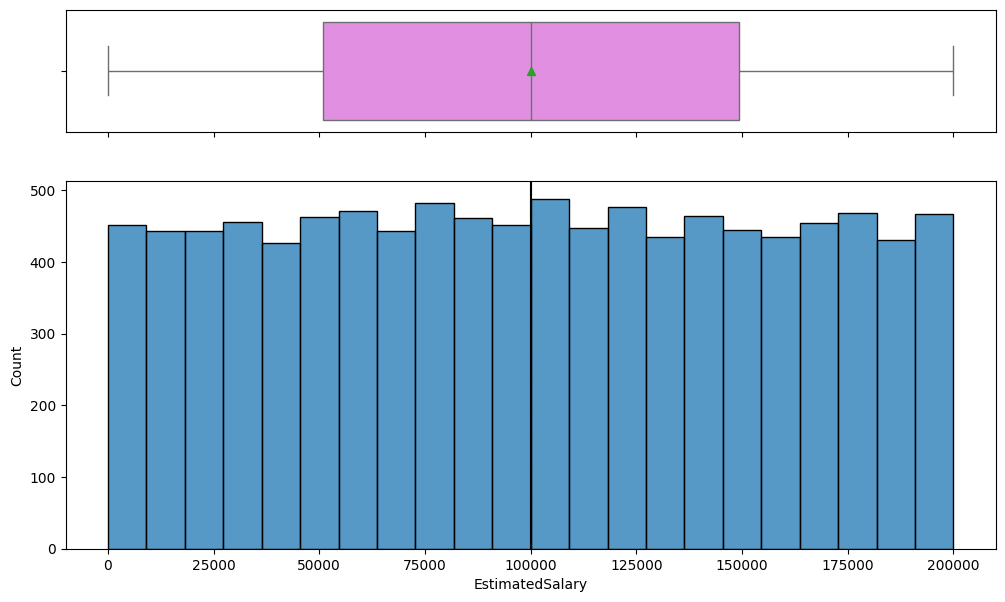

In [20]:
# Histogram Boxplot on Estimated Salary
histogram_boxplot(ds,'EstimatedSalary')

**Observations**

* This is an even / uniform distribution, with average Estimated Salary around 100000.

#### Observations on Exited

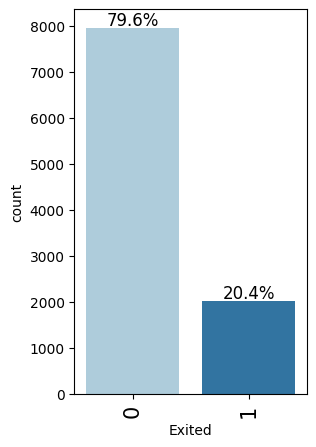

In [21]:
# Barplot on the Exited field
labeled_barplot(ds, "Exited", perc=True)

**Observations**

* This is like the Pareto distribution, with almost 80% of the Customers with the Bank, while 1 indicates about 20% have exited from the Bank !
* There is a clear indication of class imbalanced for the target variable (Exited).

#### Observations on Geography

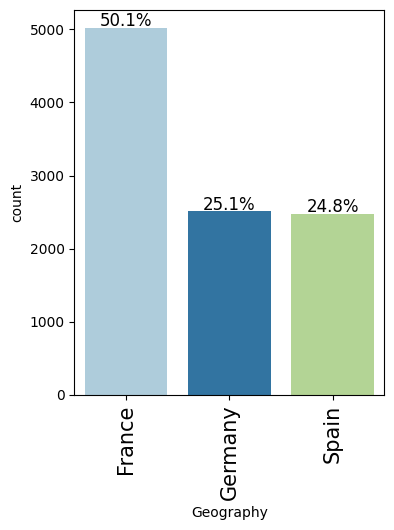

In [24]:
# Barplot on the Geography / Country field
labeled_barplot(ds, "Geography", perc=True)

**Observations**

* This is an even distribution of around 25% for two countries Germany and Spain, while French customers constitute the remaining 50%.

* The currency denomination is not mentioned, so an assumption is Euro to scale the balance and salary fields for all Customers !

#### Observations on Gender

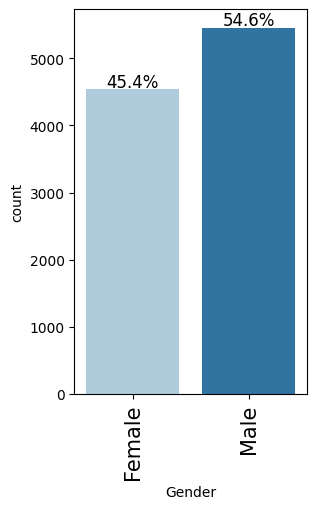

In [25]:
# Barplot on the Gender field
labeled_barplot(ds, 'Gender', perc=True)

**Observations**

* ~55% Male and ~45% customers contribute to the gender diversity amongst the Bank customers.
* Aa per Ethical AI, the Gender field and the bias should not be excluded - howevermr, as this is a test exercise we proceed with using this field in the Model and to gain insights if any !

#### Observations on Tenure

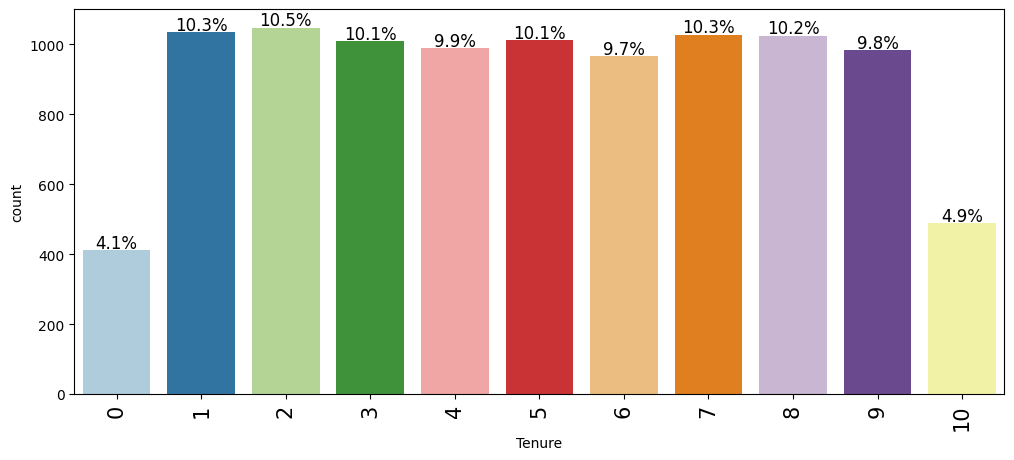

In [26]:
# Barplot on the Tenure field
labeled_barplot(ds, 'Tenure', perc=True)

**Observations**

* This is an even / uniform distribution, with average Tenure / Loyalty in terms of the number of years with the bank is ~5

#### Observations on Number of Products

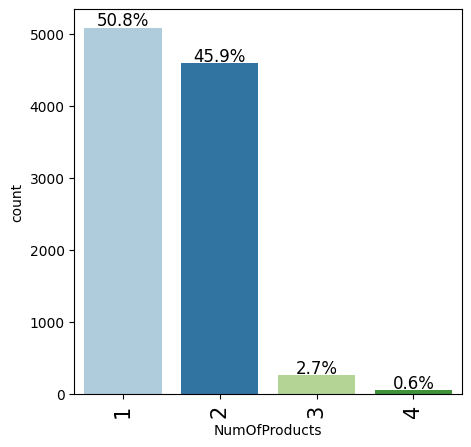

In [27]:
# Barplot on the Number of Banking Products field
labeled_barplot(ds,'NumOfProducts',perc=True)

**Observations**

* Most Customers have either 1 / 2 products - while < 3% customers have more than 3 products.
* Additional context on what these products are could help us tailor better retention strategies for the Bank's Customers.

#### Observations on Has Credit Card

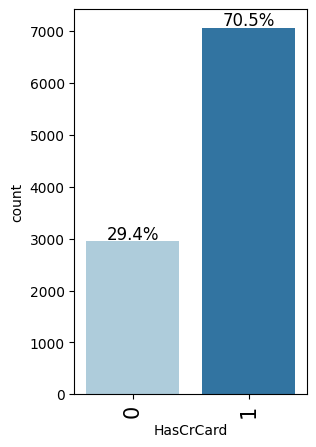

In [28]:
# Barplot on the  have Credit Cards or not field
labeled_barplot(ds,'HasCrCard',perc=True)


**Observations**

* Almost 70.5% of Customers have Credit Cards !

#### Observations on Is Active Member

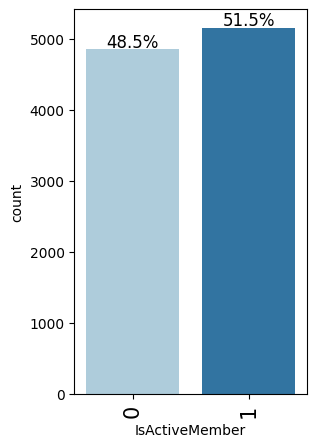

In [29]:
# Barplot on the is Customer actively using Banking products or not field
labeled_barplot(ds,'IsActiveMember',perc=True)

**Observations**

* More than 51% of Customers have been actively using the Bankingg products, while the rest have not been - which is an alarming indicator for the Bank !

### Bivariate Analysis

In [30]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Correlation plot

In [31]:
# defining the list of numerical columns
cols_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

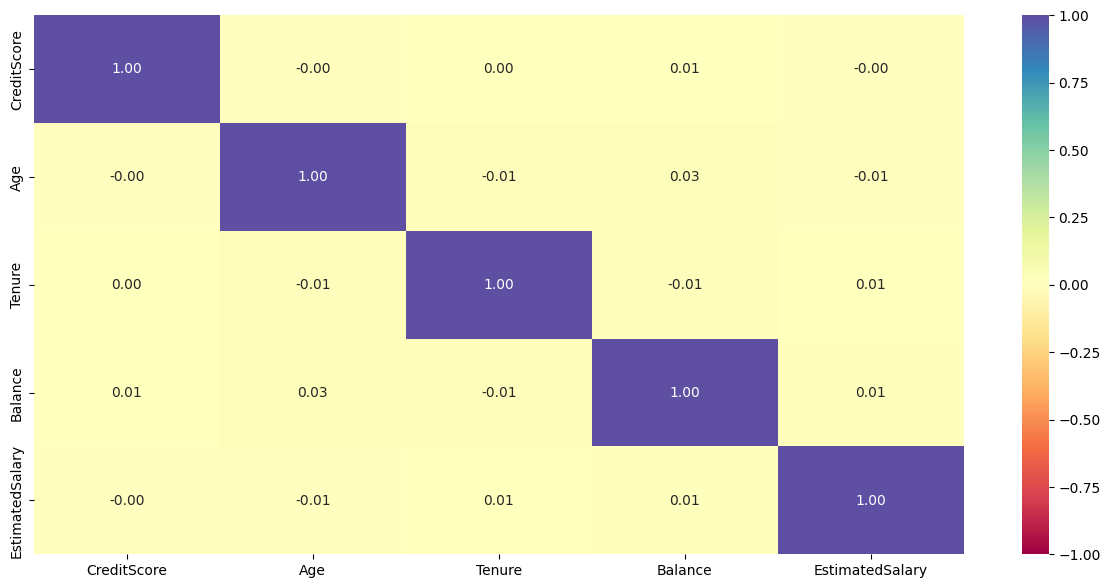

In [32]:
# Correlation plot on all the numerical columns
plt.figure(figsize=(15, 7))
sns.heatmap(ds[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations**

* There is no real correlation between any of the numerical columns !

** Note - the neural network models do not really contribute in terms of the Feature Engineering and hence the following EDA exercise of comparing the Target variable vs the Independent variable is a crucial aspect of providing insights / recommmendations on the Banking Churn reduction exercise **


#### Exited Vs Geography

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


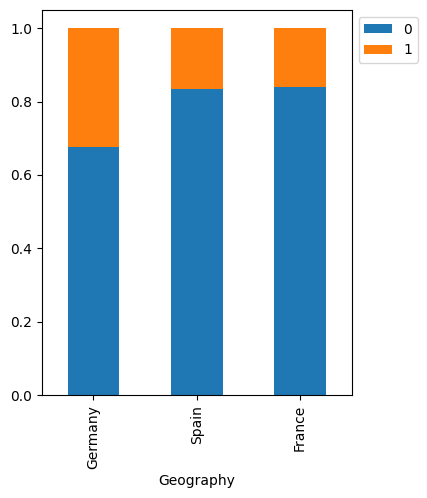

In [33]:
# Barplot created of Exited field vs Geography
stacked_barplot(ds, "Geography", "Exited" )


**Observations**

* Around 31% of Germans, have exited from the Bank while ~16% of the Customers from Spain and France have exited from the Bank. Hence our focus should be more on the German customers, to reverse this trend in future !

#### Exited Vs Gender

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


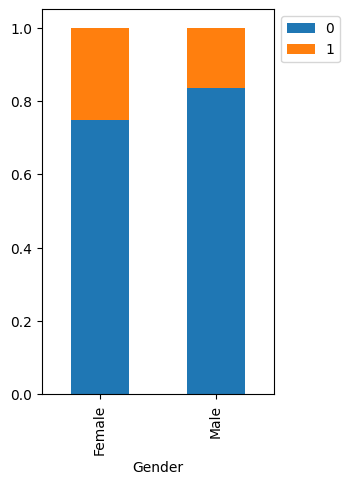

In [34]:
# Barplot created of Exited field vs Gender
stacked_barplot(ds, "Gender", "Exited" )

**Observations**

* Overall Female Bank Customers have exited from the Bank, in comparison with the Male customers.
* So Products targeting the Female customers should be on the cards to increase retention !

#### Exited Vs Has Credit Card

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


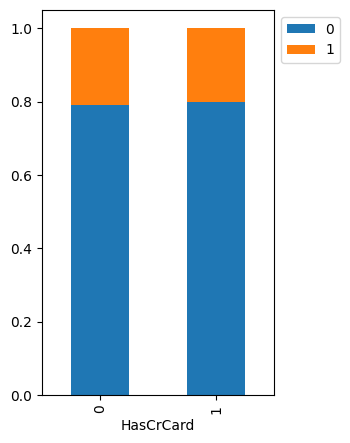

In [35]:
# Barplot created of Exited field vs Customers with CreditCard
stacked_barplot(ds, "HasCrCard", "Exited")

**Observations**

* This is about 20% of Customers with / without Credit Cards have left the Bank - so there is no derived inference based on this Bivariate analysis !

#### Exited Vs Is active member

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


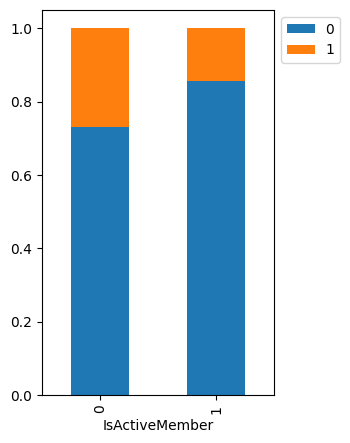

In [36]:
# Barplot created of Exited field vs Is Active member in terms of Banking products
stacked_barplot(ds, "IsActiveMember", "Exited")

**Observations**

* This is strong likelihood of Customers, who have been active with the Banking products leaving the bank is at ~14%, while around 27% (almost double of ~14%) have left the Bank, when they have not been actively using any of the Banking products / performing any transactions with the Bank !

#### Exited Vs Credit Score

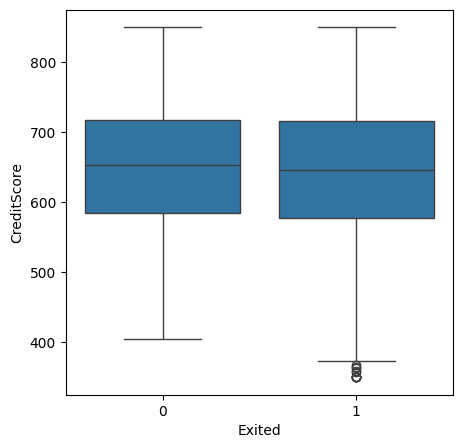

In [37]:
# Boxplot for the field Exited vs CreditScore
plt.figure(figsize=(5,5))
sns.boxplot(y='CreditScore',x='Exited',data=ds)
plt.show()

**Observations**

* This is almost an even distribution and no correlation between Exited and Creditscore fields, while there are outliers on the lower side of credit score of Customers who have exited, which would be better for the Bank in general - for they cannot be targeted with Credit Cards / other credit products !

#### Exited Vs Age

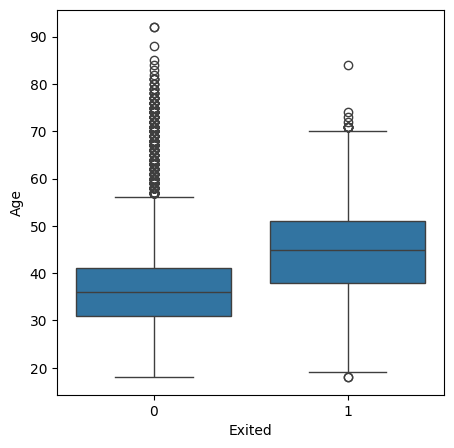

In [38]:
# Boxplot created of Exited field vs Age of Customers
plt.figure(figsize=(5,5))
sns.boxplot(y='Age',x='Exited',data=ds)
plt.show()

**Observations**

* There are lot of outliers above 55 years of old, in terms of Customers who are aged still banking - while the average being 35. On the contrary, very less outliers in terms of age beyond 70 years who have exited from the bank, with it's mean being around 45 year old Customers.
* In general, Customers who are 45 years are to be provided with some incentives for banking to enhance retention!

#### Exited Vs Tenure

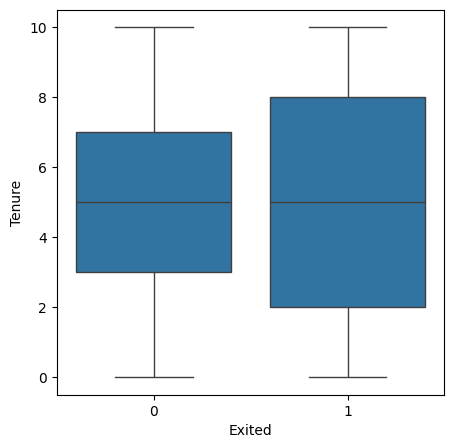

In [39]:
# Boxplot created of Exited field vs Tenure (Loyalty of number of years with Bank)
plt.figure(figsize=(5,5))
sns.boxplot(y='Tenure',x='Exited',data=ds)
plt.show()

**Observations**

* The average tenure with the people who have been and exited from the Bank remains to be 5 years, however even Customers who have been with the bank less than 3 and greater than 7 years, have left the Bank !

* So loyalty rewards are to be shared with the Customers right from 2+ years of banking, to reduce Bank Customers churn !!

Exited Vs Balance

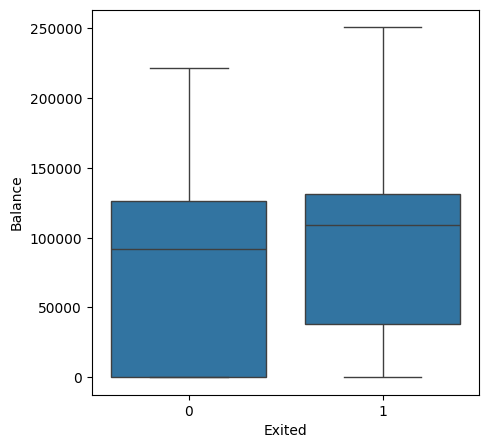

In [40]:
# Boxplot created of Exited field vs Bank Balance
plt.figure(figsize=(5,5))
sns.boxplot(y='Balance',x='Exited',data=ds)
plt.show()


**Observations**

* Customers with around 40000 or more, could leave the Bank for other Banks !
* Customers in general with the balance greater than 110000 are to be targeted with better savings rate product, in order to prevent Customer Churn !!

#### Exited Vs Number of Products

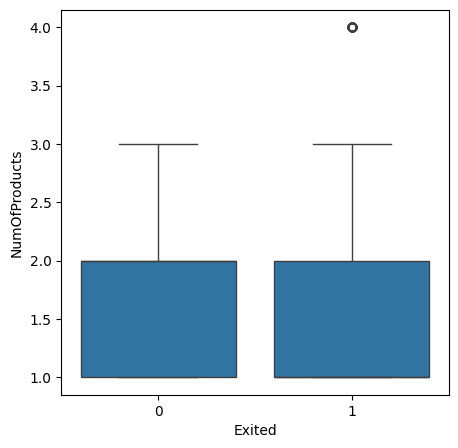

In [41]:
# Boxplot created of Exited field vs Number of Products taken
plt.figure(figsize=(5,5))
sns.boxplot(y='NumOfProducts',x='Exited',data=ds)
plt.show()


**Observations**

* There is no clear pattern, that the number of products influence the decision of the Customer to leave the bank or not !

Exited Vs Estimated Salary

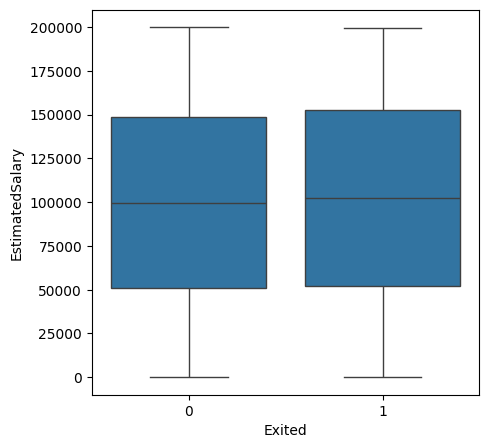

In [42]:
# Boxplot created of Exited field vs Estimated Salary of the Customer
plt.figure(figsize=(5,5))
sns.boxplot(y='EstimatedSalary',x='Exited',data=ds)
plt.show()

Observations

There is no clear pattern, that the Estimated Salary plays a role in the Customer's decision to leave the Bank - based on the uniform distribution. However people with more than 150000 are more likely to leave, based on the past data and Customers with the an estimated salary of greater than 100000 be classified as high value Customers and targeted to provide better incentives to stay with the Bank !

## Data Preprocessing

### Encoding the categorical variables

In [43]:
# to ascertain the Categorical variables
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


- There are just two Categorical variables as Geography and Gender, which are to be converted into numerical equivalent with one hot encoding / get dummies function as there is no ordinality in the values of these two fields.

### Dummy Variable Creation

In [55]:
# One Hot encoding on the two categorical field values is done
ds = pd.get_dummies(ds,columns=ds.select_dtypes(include=["object"]).columns.tolist(),drop_first=True)
ds = ds.astype(float)
ds.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,0.0,0.0,0.0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,0.0,1.0,0.0
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,0.0,0.0,0.0
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,0.0,0.0,0.0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,0.0,1.0,0.0


In [56]:
ds.shape

(10000, 12)

### Train-validation-test Split

In [57]:
X = ds.drop(['Exited'],axis=1) # Credit Score through Estimated Salary and dropping Exited field from X variable
y = ds['Exited'] # Exited variable is the only Target variable for Model building

In [58]:
## Code to Split the X and y and obtain test set
X_large, X_test, y_large, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,stratify=y,shuffle = True)

In [59]:
## Code to Split the X_large and y_large to obtain train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_large, y_large, test_size = 0.2, random_state = 42,stratify=y_large, shuffle = True)

In [60]:
#Printing the shapes
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(6400, 11) (1600, 11) (2000, 11)
(6400,) (1600,) (2000,)



**Observations**

* First we split the X and y data into 80% of Large data sets of X and y; with remaining 20% being the test data at 2000 records.
* Then the remaning 80% large set of records have been further split as 6400 records for Training and remaining 1600 at 20% for Validation purposes !
* Note stratify has been employed to ensure there is a even sort of split!


### Data Normalization

Since all the numerical values are on a different scale, so we will be scaling all the numerical values to bring them to the same scale.

In [61]:
# creating an instance of the standard scaler
sc = StandardScaler()

X_train[cols_list] = sc.fit_transform(X_train[cols_list]) # Numerical colums with fit_transform to learn the mean and variance of each of the features present
X_val[cols_list] = sc.transform(X_val[cols_list])    ## Numerical columns to normalize in the Validation set, while scaling from Train's features learned data
X_test[cols_list] = sc.transform(X_test[cols_list])    ## Numerical columns to normalize in the Test set data using Transform function only, while scaling from Train's features learned data

## Model Building

### Model Evaluation Criterion

**A model can make wrong predictions in the following two ways:**
* Predicting a bank employee is looking to exit from the bank, when the Customer (he/she) is not looking to exit, implies False Positive (FP) scenario (with false denoting the model prediction to actual outcome) !
* Predicting a bank employee is not looking to exit from the Bank, when the Customer(he/she) is in fact looking for the switch to a competitor bank ,implies False Negative (FN) scenario (with false denoting the model prediction to actual outcome).

**Which case is more important?**

Trying to reduce the FN - False Negative predictions of the model building exercise is more important, than the event of preventing FP - False Positives.

Rationale:
- In FP, there is no real loss to the Bank, as the Customers still would continue with the Bank. However, with FNs being higher, there will a large exodus of the Bank's Customers - (i.e.,) Churn is higher.

**How to reduce this loss i.e need to reduce False Negatives?**

Since the Bank would want to reduce the False Negative scenarios, in order to prevent Customer Churn the Recall evaluation metric is to be maximized.

Hence, the focus should be on increasing the Recall metric, with False Negative scenarios of model prediction being as minimal aor nullified as possible !


**Let's create a function for plotting the confusion matrix**


In [64]:
# Defininig an utility function for the Confsion matrix evaluation
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Let's create a function for plots

In [79]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [89]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Recall": recall},
        index=[0],
    )

    return df_perf

Let's create two blank dataframes that will store the recall values for all the models we build.

In [63]:
# Dataframes created for Training and Validation Recall score metric
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

### Model_0: Neural Network with SGD Optimizer

- Let's start with a neural network consisting of
  - two hidden layers with 14 and 7 neurons respectively
  - activation function of ReLU, for hidden layer and sigmoid activation function for output.
  - SGD as the optimizer

In [65]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [66]:
#Initializing the neural network
model_0 = Sequential()
# Adding the input layer with 14 neurons and relu as activation function
model_0.add(Dense(14, activation='relu', input_dim = X_train.shape[1]))
# hidden layer (7 neurons and the relu activation function)
model_0.add(Dense(7, activation='relu'))
# output layer with 1 neuron and sigmoid activation function
model_0.add(Dense(1, activation = 'sigmoid'))

In [67]:
# use SGD as the optimizer with learning rate as 0.001
optimizer = tf.keras.optimizers.SGD(0.001)

In [68]:
# Recall is the metric to be used for the Bank Churn Prediction exercise
metric = keras.metrics.Recall()

In [69]:
## Code to compile the model_0 with binary cross entropy as loss function and recall as the metric.
model_0.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])


In [70]:
# Model_0 summary
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
# defining the batch size and # epochs upfront as we'll be using the same values for all models
epochs = 25
batch_size = 64

* As we have are dealing with an imbalance in class distribution, we will be using class weights to allow the model to give proportionally more importance to the minority class.

In [72]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: np.float64(1.2558869701726845), 1: np.float64(4.9079754601226995)}

In [76]:
# Fitting the model_0
start = time.time()
history_0 = model_0.fit(
    X_train, y_train,
    batch_size=batch_size,
    validation_data=(X_val,y_val),
    epochs=epochs,
    class_weight=cw_dict,
    verbose=1
)
end=time.time()

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.4087 - recall: 0.9243 - val_loss: 0.7887 - val_recall: 0.9233
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3880 - recall: 0.8843 - val_loss: 0.7620 - val_recall: 0.8773
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3731 - recall: 0.8442 - val_loss: 0.7411 - val_recall: 0.8466
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3620 - recall: 0.8080 - val_loss: 0.7240 - val_recall: 0.8098
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3533 - recall: 0.7806 - val_loss: 0.7099 - val_recall: 0.7730
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3463 - recall: 0.7565 - val_loss: 0.6982 - val_recall: 0.7577
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3405 - recall: 0.7464 - val_loss: 0.6882 - val_recall: 0.7393
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.3356 - recall: 0.7303 - val_loss: 0.6797 - val_recall: 0.7117
Epoch 9/

In [77]:
print("Time taken in seconds for model_0 ",end-start)

Time taken in seconds for model_0  13.909919500350952


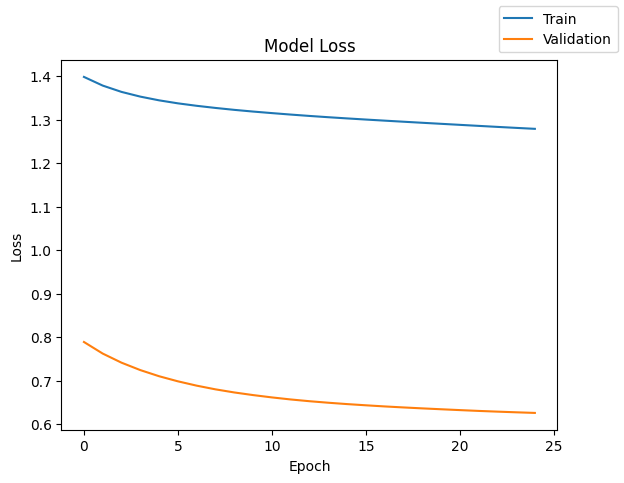

In [80]:
plot(history_0,'loss')

* Alternatively ** Loss Function defined

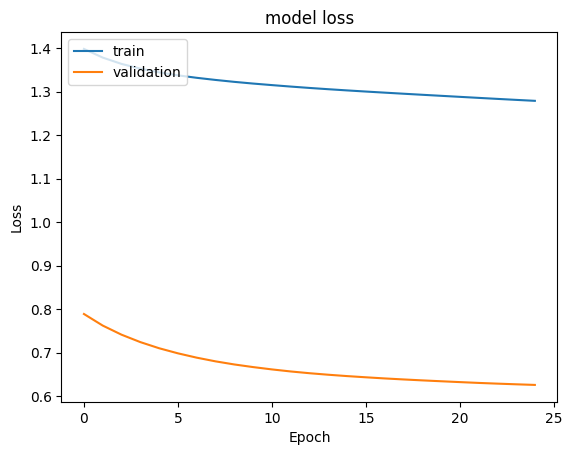

In [81]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_0.history['loss'])
plt.plot(history_0.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

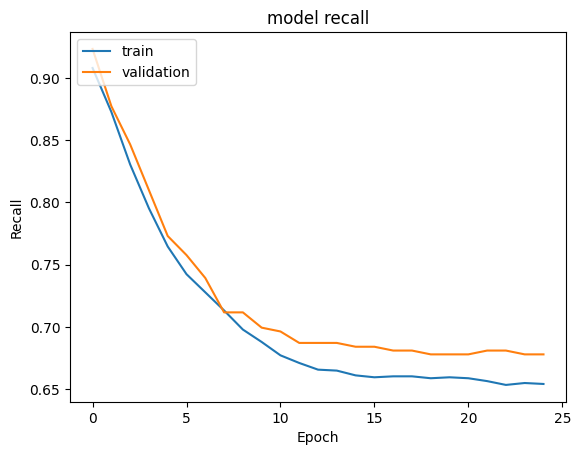

In [82]:
#Plotting Train recall vs Validation recall
plt.plot(history_0.history['recall'])
plt.plot(history_0.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [84]:
#Predicting the results using best as a threshold
y_train_pred = model_0.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [86]:
#Predicting the results using best as a threshold
y_val_pred = model_0.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [93]:
model_name = "NN with SGD"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

**Classification report**

In [94]:
#Classification report on Train data
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.88      0.64      0.74      5096
         1.0       0.32      0.65      0.43      1304

    accuracy                           0.64      6400
   macro avg       0.60      0.65      0.58      6400
weighted avg       0.76      0.64      0.68      6400



In [95]:
#classification report on Validation data
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.89      0.65      0.75      1274
         1.0       0.33      0.68      0.45       326

    accuracy                           0.66      1600
   macro avg       0.61      0.67      0.60      1600
weighted avg       0.77      0.66      0.69      1600



In [90]:
# Recall Metric of the Model on Train data (or) Alternatively only for this model_0 also check with the function as model_performance_classification
model_0_train_perf = model_performance_classification(model_0, X_train, y_train)
model_0_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


,Recall
0,0.643437


In [92]:
# Recall Metric of the Model on Validation data
model_0_valid_perf = model_performance_classification(model_0, X_val, y_val)
model_0_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Recall
0,0.6575


- Recall score of ~0.64 and ~0.65 for both train and validation indicate consistent performance of the model between training and testing datasets and not over-fitting is a Welcome News !

Even though it's a good score, the rate of improvement over the epochs is still low.

**Confusion matrix**

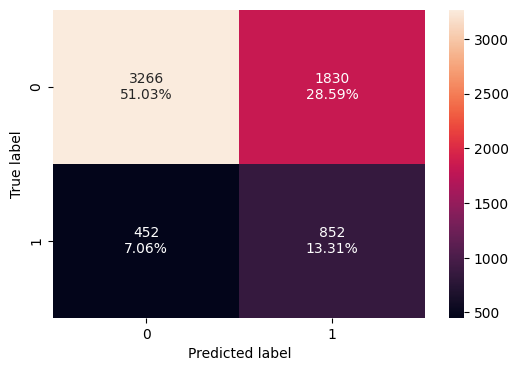

In [96]:
# Confusion matrix for Train data
make_confusion_matrix(y_train, y_train_pred)

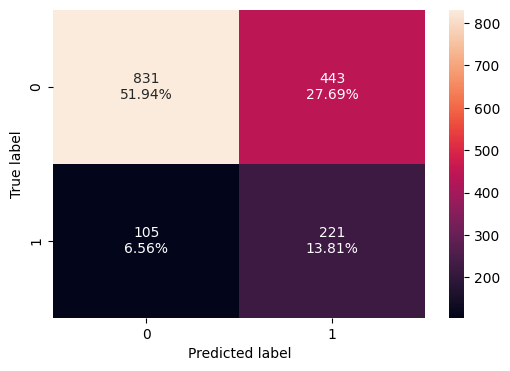

In [97]:
# Confusion matrix for Validation data
make_confusion_matrix(y_val,y_val_pred)

## Model Performance Improvement

### Model_1: Neural Network with Adam Optimizer

- Let's change the optimizer to Adam
    - This will introduce momentum as well as an adaptive learning rate

In [99]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [100]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [101]:
#Initializing the neural network
model_1 = Sequential()
# Hidden Layer # 1 with 14 neurons
model_1.add(Dense(14,activation='relu',input_dim = X_train.shape[1]))
# Hidden Layer # 2 with 7 neurons
model_1.add(Dense(7,activation='relu'))
# Output layer with 1 and sigmoid as activation function
model_1.add(Dense(1, activation = 'sigmoid'))

In [102]:
# Using Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# Metric is assigned as Recall alone
metric = keras.metrics.Recall()

In [103]:
# code to compile the model with binary cross entropy as loss function and recall as the metric
model_1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [104]:
# Summary of Model_1
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [106]:
#Fitting the Model_1 with the Class Weights assigned to overcome data imbalance issue
start = time.time()
history_1 = model_1.fit(
    X_train,y_train,
    batch_size=batch_size,
    validation_data=(X_val,y_val),
    epochs=epochs,
    class_weight=cw_dict,
    verbose=1
)
end=time.time()

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.9902 - recall: 0.7748 - val_loss: 0.5361 - val_recall: 0.7239
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.9855 - recall: 0.7766 - val_loss: 0.5329 - val_recall: 0.7331
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.9810 - recall: 0.7799 - val_loss: 0.5308 - val_recall: 0.7331
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9768 - recall: 0.7755 - val_loss: 0.5280 - val_recall: 0.7331
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9727 - recall: 0.7761 - val_loss: 0.5259 - val_recall: 0.7362
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9693 - recall: 0.7785 - val_loss: 0.5230 - val_recall: 0.7454
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9661 - recall: 0.7772 - val_loss: 0.5203 - val_recall: 0.7515
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9632 - recall: 0.7768 - val_loss: 0.5185 - val_recall: 0.7485
Epoch 9

In [107]:
print("Time taken in seconds for Model_1",end-start)

Time taken in seconds for Model_1 17.621310472488403


**Loss function**

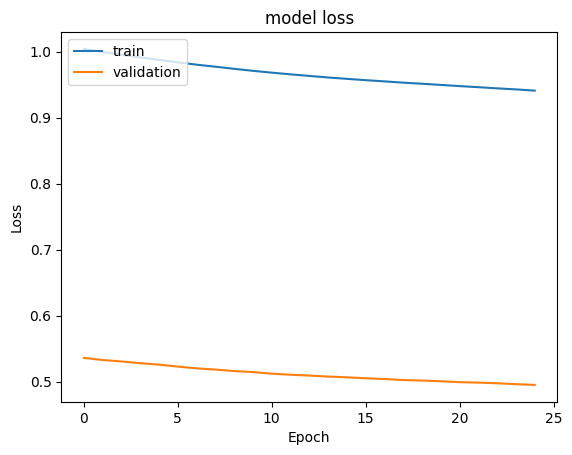

In [108]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

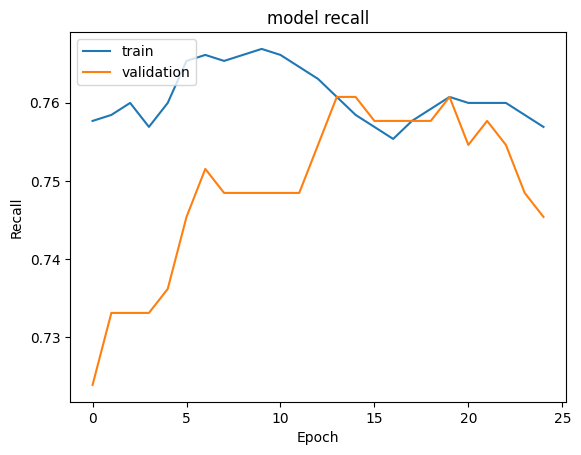

In [109]:
#Plotting Train recall vs Validation recall
plt.plot(history_1.history['recall'])
plt.plot(history_1.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [110]:
#Predicting the results using 0.5 as the threshold
y_train_pred = model_1.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [111]:
#Predicting the results using 0.5 as the threshold
y_val_pred = model_1.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [112]:
model_name = "NN with Adam"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [113]:
#Classification report on Train data
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.93      0.78      0.85      5096
         1.0       0.47      0.77      0.58      1304

    accuracy                           0.78      6400
   macro avg       0.70      0.77      0.71      6400
weighted avg       0.84      0.78      0.79      6400



In [114]:
#classification report on Validation data
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.92      0.77      0.84      1274
         1.0       0.45      0.75      0.56       326

    accuracy                           0.76      1600
   macro avg       0.69      0.76      0.70      1600
weighted avg       0.83      0.76      0.78      1600



**Confusion matrix**

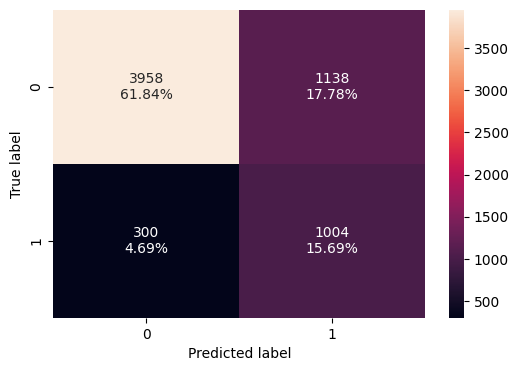

In [115]:
#Calculating the confusion matrix for Train data
make_confusion_matrix(y_train, y_train_pred)

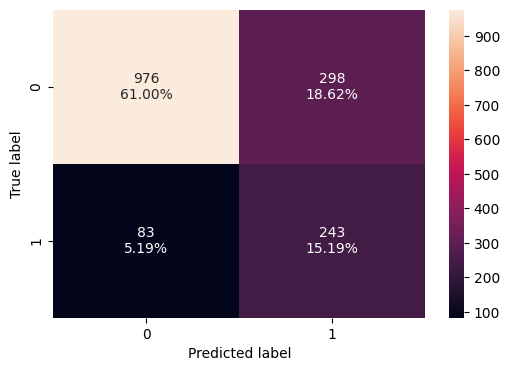

In [116]:
# Confusion matrix for Validation data
make_confusion_matrix(y_val,y_val_pred)

In [117]:
# Recall Metric of the Model on Train data (or) Alternatively only for this model_0 also check with the function as model_performance_classification
model_1_train_perf = model_performance_classification(model_1, X_train, y_train)
model_1_train_perf



200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Recall
0,0.775312


In [118]:
# Recall Metric of the Model on Validation data
model_1_valid_perf = model_performance_classification(model_1, X_val, y_val)
model_1_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Recall
0,0.761875


* Although the recall score seeems to generalize well with the validation data, the value of recall is still low.
* The difference between train loss and validation loss is still high !

### Model_2: Neural Network with Adam Optimizer and Dropout

* The difference between the train loss and test loss is high.
Let's add dropout to regularize it.

In [119]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [120]:
#Initializing the neural network
model_2 = Sequential()
#Adding the input layer with 14 neurons and relu as activation function
model_2.add(Dense(14,activation='relu',input_dim = X_train.shape[1]))
# Add dropout with ratio of 0.4
model_2.add(Dropout(0.4))
# code to add a hidden layer (specify the 7 number of neurons and the activation function)
model_2.add(Dense(7,activation="relu"))
# Add dropout with ratio of 0.2
model_2.add(Dropout(0.2))
# Code to add the number of neurons as 1 required in the output layer.
model_2.add(Dense(1,activation="sigmoid"))

In [121]:
# Using Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# Metric is assigned as Recall alone
metric = keras.metrics.Recall()

In [122]:
# code to compile the model with binary cross entropy as loss function and recall as the metric
model_2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [123]:
# Summary of the model
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [125]:
#Fitting the ANN with batch_size = 32 and 100 epochs
history_2 = model_2.fit(
    X_train,y_train,
    batch_size=32,
    epochs=100,
    verbose=1,
    validation_data=(X_val,y_val),
    class_weight=cw_dict
)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.5317 - recall: 0.5924 - val_loss: 0.6680 - val_recall: 0.5920
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.3414 - recall: 0.5862 - val_loss: 0.6361 - val_recall: 0.6442
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.2982 - recall: 0.6385 - val_loss: 0.6176 - val_recall: 0.6411
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1.2679 - recall: 0.6585 - val_loss: 0.6103 - val_recall: 0.6626
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.2476 - recall: 0.6703 - val_loss: 0.5883 - val_recall: 0.6472
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2271 - recall: 0.6598 - val_loss: 0.5749 - val_recall: 0.6564
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2145 - recall: 0.7134 - val_loss: 0.5818 - val_recall: 0.6687
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1864 - recall: 0.7235 - val_loss: 0.5719 - val_recall: 0.6718


**Loss function**

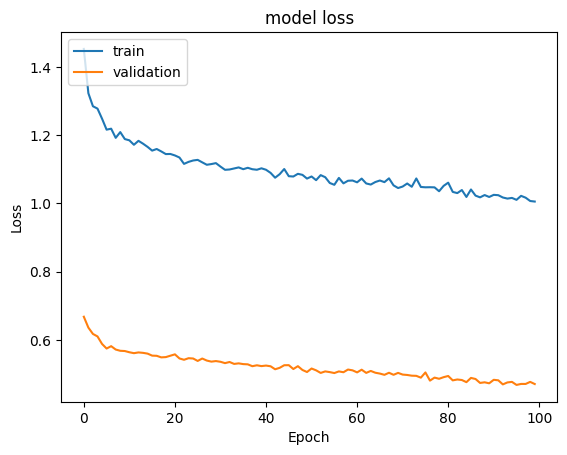

In [126]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

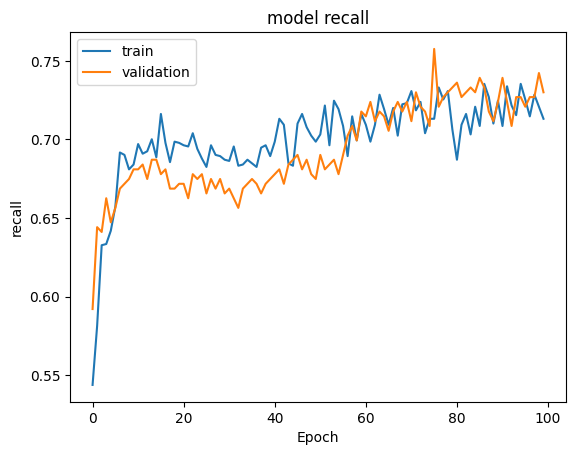

In [127]:
#Plotting Train recall vs Validation recall
plt.plot(history_2.history['recall'])
plt.plot(history_2.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [128]:
#Predicting the results using best as a threshold
y_train_pred = model_2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [129]:
#Predicting the results using 0.5 as the threshold.
y_val_pred = model_2.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [130]:
model_name = "NN with Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [131]:
#classification report of train data
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.93      0.80      0.86      5096
         1.0       0.50      0.78      0.61      1304

    accuracy                           0.80      6400
   macro avg       0.72      0.79      0.73      6400
weighted avg       0.84      0.80      0.81      6400



In [132]:
#classification report on Validation data
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.92      0.80      0.85      1274
         1.0       0.48      0.73      0.58       326

    accuracy                           0.78      1600
   macro avg       0.70      0.76      0.72      1600
weighted avg       0.83      0.78      0.80      1600



**Confusion matrix**

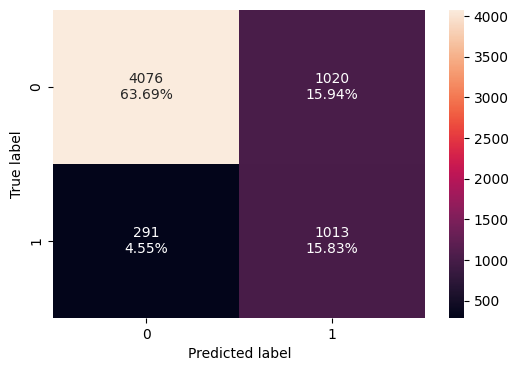

In [133]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

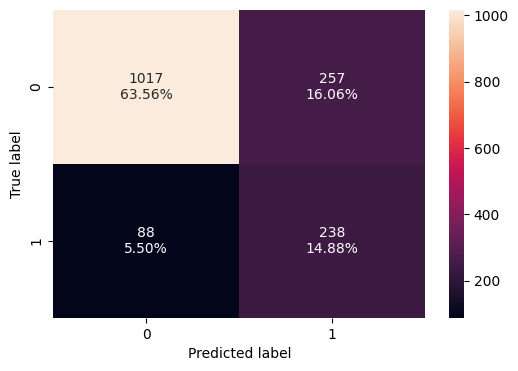

In [134]:
# Confusion matrix for Validation data
make_confusion_matrix(y_val,y_val_pred)

In [135]:
# Recall Metric of the Model on Train data (or) Alternatively only for this model_2 also check with the function as model_performance_classification
model_2_train_perf = model_performance_classification(model_2, X_train, y_train)
model_2_train_perf


200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


,Recall
0,0.795156


In [136]:
# Recall Metric of the Model on Validation data
model_2_valid_perf = model_performance_classification(model_2, X_val, y_val)
model_2_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


,Recall
0,0.784375


- The difference between train and validation scores has still not reduced although they have generalized well between test and validation at 0.795 and 0.784 respectively.

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

**Let's try to apply SMOTE to balance this dataset and then again apply hyperparamter tuning accordingly.**

In [137]:
sm  = SMOTE(random_state=42)
#Complete the code to fit SMOTE on the training data.
X_train_smote, y_train_smote= sm.fit_resample(X_train,y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (10192, 11)
After UpSampling, the shape of train_y: (10192,) 



* Let's build a model with the balanced dataset using SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance better !

In [138]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [139]:
#Initializing the neural network
model_3 = Sequential()
# Hidden Layer # 1 with 14 neurons
model_3.add(Dense(14,activation='relu',input_dim = X_train.shape[1]))
# Hidden Layer # 2 with 7 neurons
model_3.add(Dense(7,activation='relu'))
# Output layer with 1 and sigmoid as activation function
model_3.add(Dense(1, activation = 'sigmoid'))

In [140]:
# Using SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD()

# Metric is assigned as Recall alone
metric = keras.metrics.Recall()

In [141]:
# code to compile the model with binary cross entropy as loss function and recall as the metric
model_3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [142]:
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [143]:
#Fitting the ANN
history_3 = model_3.fit(
    X_train_smote, y_train_smote,
    batch_size=32,
    epochs=100,
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6819 - recall: 0.8164 - val_loss: 0.6450 - val_recall: 0.6933
Epoch 2/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6437 - recall: 0.6621 - val_loss: 0.6160 - val_recall: 0.6779
Epoch 3/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6244 - recall: 0.6642 - val_loss: 0.5985 - val_recall: 0.6871
Epoch 4/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6080 - recall: 0.6884 - val_loss: 0.5863 - val_recall: 0.7025
Epoch 5/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5953 - recall: 0.7023 - val_loss: 0.5791 - val_recall: 0.7055
Epoch 6/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5863 - recall: 0.7208 - val_loss: 0.5747 - val_recall: 0.7086
Epoch 7/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.5802 - recall: 0.7286 - val_loss: 0.5719 - val_recall: 0.7209
Epoch 8/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5760 - recall: 0.7348 - val_loss: 0.5710 - val_recall: 0.7209


**Loss function**

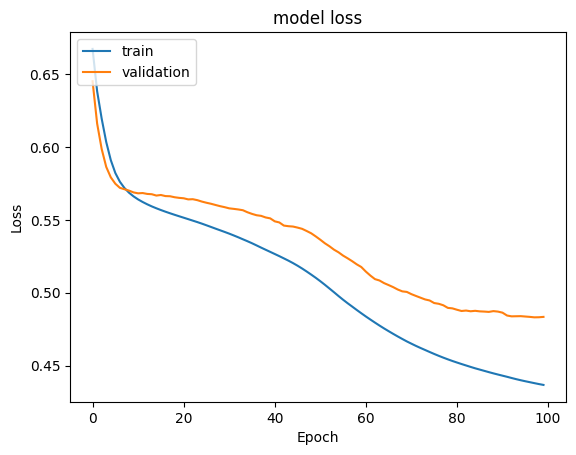

In [144]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

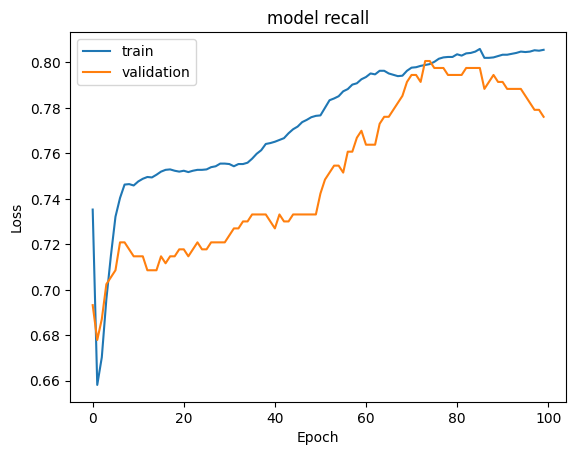

In [145]:
#Plotting Train recall vs Validation recall
plt.plot(history_3.history['recall'])
plt.plot(history_3.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [146]:
y_train_pred = model_3.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [147]:
y_val_pred = model_3.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [148]:
model_name = "NN with SMOTE & SGD"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [149]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.82      0.78      0.80      5096
         1.0       0.79      0.83      0.81      5096

    accuracy                           0.81     10192
   macro avg       0.81      0.81      0.81     10192
weighted avg       0.81      0.81      0.81     10192



In [151]:
#classification report on Validation data
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.93      0.76      0.84      1274
         1.0       0.45      0.78      0.57       326

    accuracy                           0.76      1600
   macro avg       0.69      0.77      0.71      1600
weighted avg       0.83      0.76      0.78      1600



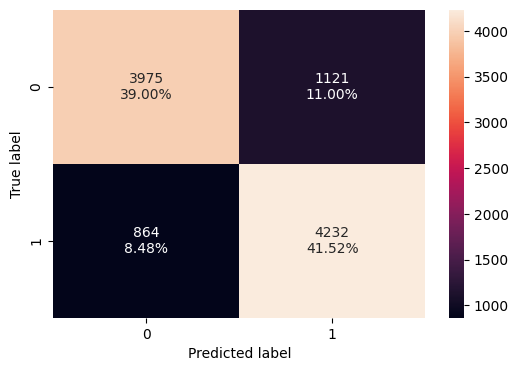

In [152]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

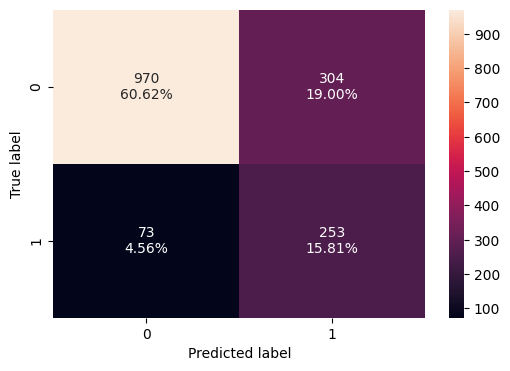

In [153]:
# Confusion matrix for Validation data
make_confusion_matrix(y_val,y_val_pred)


In [154]:
# Recall Metric of the Model on Train data (or) Alternatively only for this model_3 also check with the function as model_performance_classification
model_3_train_perf = model_performance_classification(model_3, X_train, y_train)
model_3_train_perf



200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Recall
0,0.784062


In [155]:
# Recall Metric of the Model on Validation data
model_3_valid_perf = model_performance_classification(model_3, X_val, y_val)
model_3_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


,Recall
0,0.764375


* Train and Validation's recall score are close, let us try other models

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

* Let's build a model with the balanced dataset

In [156]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [157]:
#Initializing the neural network
model_4 = Sequential()
# Hidden Layer # 1 with 14 neurons
model_4.add(Dense(14,activation='relu',input_dim = X_train.shape[1]))
# Hidden Layer # 2 with 7 neurons
model_4.add(Dense(7,activation='relu'))
# Output layer with 1 and sigmoid as activation function
model_4.add(Dense(1, activation = 'sigmoid'))

In [158]:
# Summary of model_4
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [159]:
# Using Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# Metric is assigned as Recall alone
metric = keras.metrics.Recall()

In [160]:
# code to compile the model with binary cross entropy as loss function and recall as the metric
model_4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [161]:
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [162]:
#Fitting the ANN

history_4 = model_4.fit(
    X_train_smote,y_train_smote,
    batch_size=batch_size, ## Complete the code to specify the batch size to use
    epochs=epochs,  ## Complete the code to specify the number of epochs
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.6729 - recall: 0.7923 - val_loss: 0.6029 - val_recall: 0.6840
Epoch 2/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.6022 - recall: 0.6901 - val_loss: 0.5743 - val_recall: 0.7055
Epoch 3/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5758 - recall: 0.7299 - val_loss: 0.5672 - val_recall: 0.6994
Epoch 4/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5648 - recall: 0.7342 - val_loss: 0.5642 - val_recall: 0.6963
Epoch 5/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.5577 - recall: 0.7346 - val_loss: 0.5617 - val_recall: 0.6994
Epoch 6/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.5519 - recall: 0.7376 - val_loss: 0.5573 - val_recall: 0.6963
Epoch 7/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.5467 - recall: 0.7422 - val_loss: 0.5537 - val_recall: 0.6933
Epoch 8/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5410 - recall: 0.7495 - val_loss: 0.5505 - val_recall: 0.6871
Epoc

**Loss function**

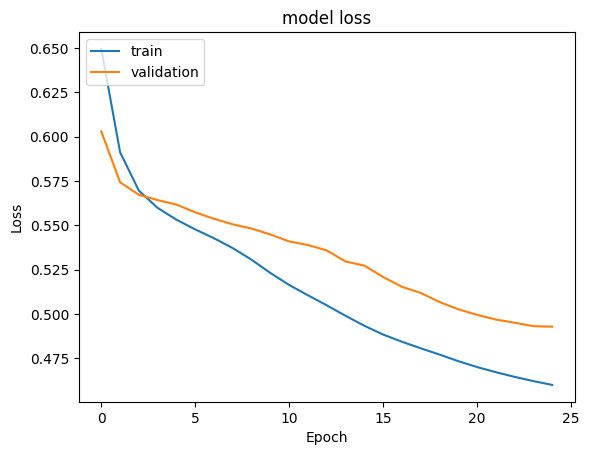

In [164]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

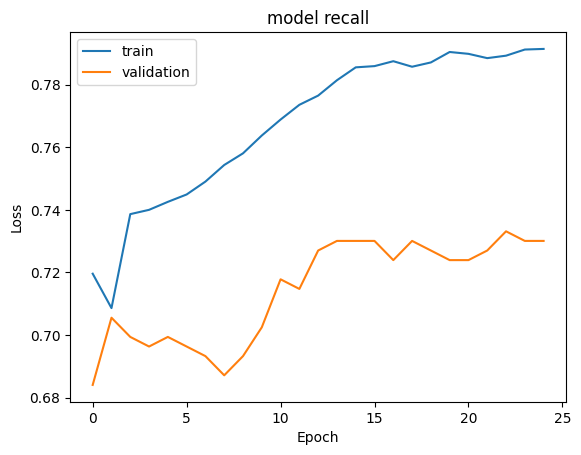

In [165]:
#Plotting Train recall vs Validation recall
plt.plot(history_4.history['recall'])
plt.plot(history_4.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [166]:
y_train_pred = model_4.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [167]:
y_val_pred = model_4.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [168]:
model_name = "NN with SMOTE & Adam"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

In [169]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79      5096
         1.0       0.79      0.80      0.79      5096

    accuracy                           0.79     10192
   macro avg       0.79      0.79      0.79     10192
weighted avg       0.79      0.79      0.79     10192



In [170]:
#classification report on Validation data
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.92      0.78      0.84      1274
         1.0       0.46      0.73      0.56       326

    accuracy                           0.77      1600
   macro avg       0.69      0.75      0.70      1600
weighted avg       0.82      0.77      0.78      1600



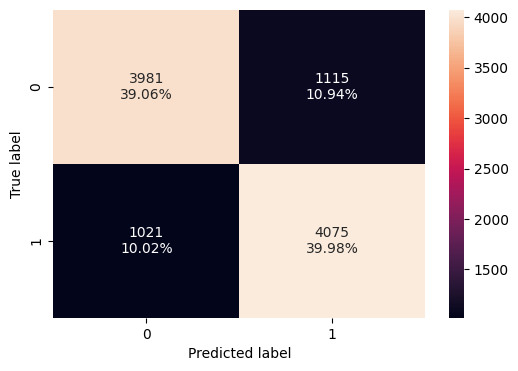

In [171]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

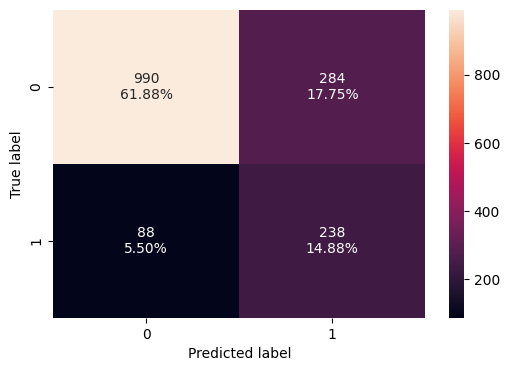

In [172]:
# Confusion matrix for Validation data
make_confusion_matrix(y_val,y_val_pred)


In [173]:
# Recall Metric of the Model on Train data (or) Alternatively only for this model_4 also check with the function as model_performance_classification
model_4_train_perf = model_performance_classification(model_4, X_train, y_train)
model_4_train_perf



200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


,Recall
0,0.78


In [174]:
# Recall Metric of the Model on Validation data
model_4_valid_perf = model_performance_classification(model_4, X_val, y_val)
model_4_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


,Recall
0,0.7675


* Validation and test score generalize well, while lets try using the other model as well on Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [175]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [177]:
#Initializing the neural network
model_5 = Sequential()
# Hidden Layer # 1 with 14 neurons
model_5.add(Dense(14,activation='relu',input_dim = X_train.shape[1]))
# Adding dropouts to previous iterations
model_5.add(Dropout(0.4))
# Hidden Layer # 2 with 7 neurons
model_5.add(Dense(7,activation='relu'))
model_5.add(Dropout(0.2))
# Output layer with 1 and sigmoid as activation function
model_5.add(Dense(1, activation = 'sigmoid'))

In [178]:
# Using Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# Metric is assigned as Recall alone
metric = keras.metrics.Recall()

In [179]:
# code to compile the model with binary cross entropy as loss function and recall as the metric
model_5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [180]:
history_5 = model_5.fit(
    X_train_smote,y_train_smote,
    batch_size=100,
    epochs=32,
    verbose=1,
    validation_data = (X_val,y_val))

Epoch 1/32
102/102 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.7322 - recall: 0.5296 - val_loss: 0.6690 - val_recall: 0.5675
Epoch 2/32
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6738 - recall: 0.4829 - val_loss: 0.6299 - val_recall: 0.5675
Epoch 3/32
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.6493 - recall: 0.5617 - val_loss: 0.6014 - val_recall: 0.6043
Epoch 4/32
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6370 - recall: 0.6467 - val_loss: 0.5754 - val_recall: 0.6288
Epoch 5/32
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6227 - recall: 0.6844 - val_loss: 0.5696 - val_recall: 0.6718
Epoch 6/32
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6137 - recall: 0.6989 - val_loss: 0.5676 - val_recall: 0.6840
Epoch 7/32
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6063 - recall: 0.7230 - val_loss: 0.5669 - val_recall: 0.6871
Epoch 8/32
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6043 - recall: 0.7317 - val_loss: 0.5610 - val_recall: 0.6779
Epoch 

**Loss function**


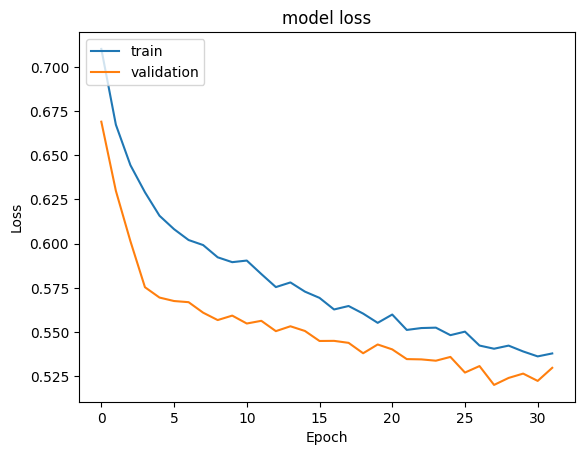

In [181]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

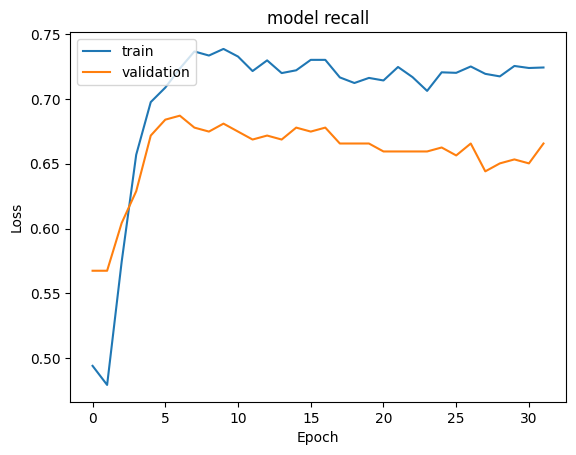

In [182]:
#Plotting Train recall vs Validation recall
plt.plot(history_5.history['recall'])
plt.plot(history_5.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [183]:
y_train_pred = model_5.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [184]:
y_val_pred = model_5.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [185]:
model_name = "NN with SMOTE,Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

In [186]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.75      0.79      0.77      5096
         1.0       0.78      0.74      0.76      5096

    accuracy                           0.77     10192
   macro avg       0.77      0.77      0.77     10192
weighted avg       0.77      0.77      0.77     10192



In [187]:
#classification report on Validation data
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.90      0.78      0.83      1274
         1.0       0.43      0.67      0.52       326

    accuracy                           0.75      1600
   macro avg       0.67      0.72      0.68      1600
weighted avg       0.81      0.75      0.77      1600



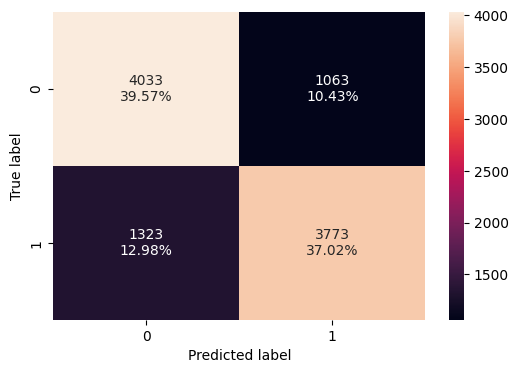

In [188]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

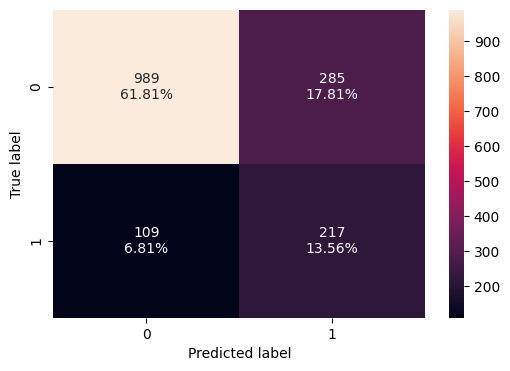

In [189]:
# Confusion matrix for Validation data
make_confusion_matrix(y_val,y_val_pred)


In [190]:
# Recall Metric of the Model on Train data (or) Alternatively only for this model_5 also check with the function as model_performance_classification
model_5_train_perf = model_performance_classification(model_5, X_train, y_train)
model_5_train_perf



200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Recall
0,0.775156


In [191]:
# Recall Metric of the Model on Validation data
model_5_valid_perf = model_performance_classification(model_1, X_val, y_val)
model_5_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


,Recall
0,0.761875


* This is the closest in terms of Test and Validation data on the F1 score and has generalized well !

## Model Performance Comparison and Final Model Selection

In [192]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,recall
NN with SGD,0.653374
NN with Adam,0.769939
NN with Adam & Dropout,0.776840
NN with SMOTE & SGD,0.830455
NN with SMOTE & Adam,0.799647
"NN with SMOTE,Adam & Dropout",0.740385


In [193]:
print("Validation set performance comparison")
valid_metric_df

Validation set performance comparison


,recall
NN with SGD,0.677914
NN with Adam,0.745399
NN with Adam & Dropout,0.730061
NN with SMOTE & SGD,0.776074
NN with SMOTE & Adam,0.730061
"NN with SMOTE,Adam & Dropout",0.665644


In [194]:
print("Based on the difference in the train and validation data to find the best F1 score in terms of difference")
train_metric_df - valid_metric_df

Based on the difference in the train and validation data to find the best F1 score in terms of difference


,recall
NN with SGD,-0.024540
NN with Adam,0.024540
NN with Adam & Dropout,0.046779
NN with SMOTE & SGD,0.054382
NN with SMOTE & Adam,0.069585
"NN with SMOTE,Adam & Dropout",0.074740


In [195]:
# Because we addressed the Class weight imbalance problem initially, even without using SMOTE model_1 turns out to be the best model to be used on the Test data
y_test_pred = model_1.predict(X_test)    ## Complete the code to specify the best model
y_test_pred = (y_test_pred > 0.5)
print(y_test_pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


In [196]:
#lets print classification report on test data
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.93      0.76      0.84      1593
         1.0       0.45      0.77      0.57       407

    accuracy                           0.76      2000
   macro avg       0.69      0.76      0.70      2000
weighted avg       0.83      0.76      0.78      2000



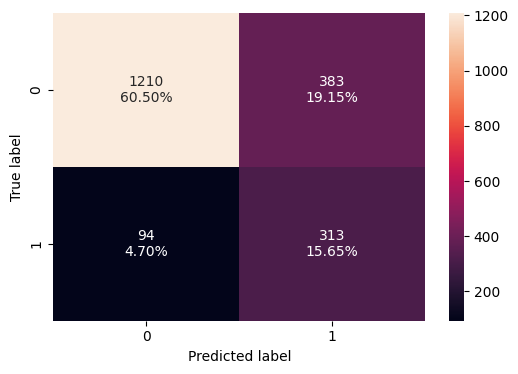

In [197]:
#Calculating the confusion matrix on test data
make_confusion_matrix(y_test,y_test_pred)

In [198]:
# Recall Metric of the Model on Test data again !
model_1_valid_perf = model_performance_classification(model_1, X_test, y_test)
model_1_valid_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Recall
0,0.7615


* On the Train data F1 score is 0.76999, and on the unseen test data is generalizes very well at 0.7615 and hence is the Best model to be used for predictions !!

## Actionable Insights and Business Recommendations

Actionable Insights and Recommendations

Note: Employing neural networks does not highlight feature importance and hence the recommendations are made from the EDA in general which have been highlighted in the Bivariate analysis above, while the Model using Adam optimizer has a very good value of 0.76 and has generalized well for predicting the Bank customer churn !!

What recommedations would you suggest to the bank?

Engagement of dormant Members: The bank might launch a campaign to turn dormant members into active clients. To help these clients get the most out of their accounts, this can entail contacting them with exclusive deals or incentives or offering them individualized financial guidance.

Product Retention and Diversification: There is a chance to encourage customers to diversify their product holdings because the minority of customers who only own one product (51%). Create retention techniques to hold on to clients that possess numerous items, like incentives or packaged services.

Services That Consider Age: Given that quitting a bank is positively correlated with age, you should think about offering age-specific services or incentives to keep customers in particular age ranges. Customizing services to fit various stages of life could increase client retention.

Retention based on Tenure: Higher rates of customer churn are seen among those with shorter tenures—one year and zero years. Use promotions, individualized services, or onboarding programs to win over more customers throughout the early years of their bank relationship.



<font size=6 color='blue'>Power Ahead</font>
___